In [46]:
import pandas as pd
import numpy as np
import json
import peakutils
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

In [2]:
def load_json(file):
    '''
    Loads txt file and returns json dict
    '''
    data = {}
    with open(file, encoding='utf-8') as f:
        for line in f:
            d = str(line).replace("'", '"')
            data = json.loads(d)
    
    return data

In [3]:
def get_sequence(data_list, sensor):
    '''
    Return list of sensor data from data_list
    '''
    l = []       
    for i in range(len(data)):
        lst = []
        for j in range(len(data[i]['seq'])):            
            lst.append(data[i]['seq'][j]['data'][sensor])
        l.append(lst)
        
    return l

In [4]:
def get_mean_sd_peaks(seq_data):
    '''
    Calculates the mean, sd, and number of peaks for each sequence of data for each sensor
    '''
    means = []
    stds = []
    peaks = []
    for lst in seq_data:
        means.append(np.mean(lst))
        stds.append(np.std(lst))
        peaks.append(len(peakutils.indexes(lst, thres=0.02/max(lst), min_dist=0.1)))
    
    return means, stds, peaks

In [6]:
data = load_json('class-data/driving.txt')

In [7]:
xaccl = get_sequence(data, 'xAccl')

In [8]:
xaccl_mean, xaccl_sd, xaccl_peaks = get_mean_sd_peaks(xaccl)

In [26]:
def process_sequence(file):
    '''
    Loads data and creates dictionary of calculations from accelerometer data
    '''
    data = load_json(file)
    
    # obtain actitivy from trace
    activity = data[0]['type']
    
    # obtain accelerometer data from each axis
    x_accl = get_sequence(data, 'xAccl')
    y_accl = get_sequence(data, 'yAccl')
    z_accl = get_sequence(data, 'zAccl')
    
    # obtain gyroscope data from each axis
    x_gyro = get_sequence(data, 'xGyro')
    y_gyro = get_sequence(data, 'yGyro')
    z_gyro = get_sequence(data, 'zGyro')

    # obtain mag sensor data from each axis
    x_mag = get_sequence(data, 'xMag')
    y_mag = get_sequence(data, 'yMag')
    z_mag = get_sequence(data, 'zMag')
        
    # calculate means, sd, num peaks for data sequence
    x_accl_mean, x_accl_sd, x_accl_peaks = get_mean_sd_peaks(x_accl)
    y_accl_mean, y_accl_sd, y_accl_peaks = get_mean_sd_peaks(y_accl)
    z_accl_mean, z_accl_sd, z_accl_peaks = get_mean_sd_peaks(z_accl)
    
    x_gyro_mean, x_gyro_sd, x_gyro_peaks = get_mean_sd_peaks(x_gyro)
    y_gyro_mean, y_gyro_sd, y_gyro_peaks = get_mean_sd_peaks(y_gyro)
    z_gyro_mean, z_gyro_sd, z_gyro_peaks = get_mean_sd_peaks(z_gyro)
    
    x_mag_mean, x_mag_sd, x_mag_peaks = get_mean_sd_peaks(x_mag)
    y_mag_mean, y_mag_sd, y_mag_peaks = get_mean_sd_peaks(y_mag)
    z_mag_mean, z_mag_sd, z_mag_peaks = get_mean_sd_peaks(z_mag)
    
    clean_data = {
        'activity': [],
        'x_accl_mean': [], 'x_accl_sd': [], 'x_accl_peaks': [],
        'y_accl_mean': [], 'y_accl_sd': [], 'y_accl_peaks': [],
        'z_accl_mean': [], 'z_accl_sd': [], 'z_accl_peaks': [],
        'x_gyro_mean': [], 'x_gyro_sd': [], 'x_gyro_peaks': [],
        'y_gyro_mean': [], 'y_gyro_sd': [], 'y_gyro_peaks': [],
        'z_gyro_mean': [], 'z_gyro_sd': [], 'z_gyro_peaks': [], 
        'x_mag_mean': [], 'x_mag_sd': [], 'x_mag_peaks': [], 
        'y_mag_mean': [], 'y_mag_sd': [], 'y_mag_peaks': [],
        'z_mag_mean': [], 'z_mag_sd': [], 'z_mag_peaks': []
    }
    
    for i in range(len(x_accl_mean)):    
        clean_data['activity'].append(activity)
        clean_data['x_accl_mean'].append(x_accl_mean[i])
        clean_data['x_accl_sd'].append(x_accl_sd[i])
        clean_data['x_accl_peaks'].append(x_accl_peaks[i])
        clean_data['y_accl_mean'].append(y_accl_mean[i])
        clean_data['y_accl_sd'].append(y_accl_sd[i])
        clean_data['y_accl_peaks'].append(y_accl_peaks[i])
        clean_data['z_accl_mean'].append(z_accl_mean[i])
        clean_data['z_accl_sd'].append(z_accl_sd[i])
        clean_data['z_accl_peaks'].append(z_accl_peaks[i])
        clean_data['x_gyro_mean'].append(x_gyro_mean[i])
        clean_data['x_gyro_sd'].append(x_gyro_sd[i])
        clean_data['x_gyro_peaks'].append(x_gyro_peaks[i])
        clean_data['y_gyro_mean'].append(y_gyro_mean[i])
        clean_data['y_gyro_sd'].append(y_gyro_sd[i])
        clean_data['y_gyro_peaks'].append(y_gyro_peaks[i])
        clean_data['z_gyro_mean'].append(z_gyro_mean[i])
        clean_data['z_gyro_sd'].append(z_gyro_sd[i])
        clean_data['z_gyro_peaks'].append(z_gyro_peaks[i])
        clean_data['x_mag_mean'].append(x_mag_mean[i])
        clean_data['x_mag_sd'].append(x_mag_sd[i])
        clean_data['x_mag_peaks'].append(x_mag_peaks[i])
        clean_data['y_mag_mean'].append(y_mag_mean[i])
        clean_data['y_mag_sd'].append(y_mag_sd[i])
        clean_data['y_mag_peaks'].append(y_mag_peaks[i])
        clean_data['z_mag_mean'].append(z_mag_mean[i])
        clean_data['z_mag_sd'].append(z_mag_sd[i])
        clean_data['z_mag_peaks'].append(z_mag_peaks[i])

#     cols = ['x_accl_mean', 'x_accl_sd', 'x_accl_peaks',
#             'y_accl_mean', 'y_accl_sd', 'y_accl_peaks',
#             'z_accl_mean', 'z_accl_sd', 'z_accl_peaks',
#             'x_gyro_mean', 'x_gyro_sd', 'x_gyro_peaks',
#             'y_gyro_mean', 'y_gyro_sd', 'y_gyro_peaks',
#             'z_gyro_mean', 'z_gyro_sd', 'z_gyro_peaks', 
#             'x_mag_mean', 'x_mag_sd', 'x_mag_peaks', 
#             'y_mag_mean', 'y_mag_sd', 'y_mag_peaks',
#             'z_mag_mean', 'z_mag_sd', 'z_mag_peaks']
#     data_list = [x_accl_mean, x_accl_sd, x_accl_peaks,
#                 y_accl_mean, y_accl_sd, y_accl_peaks,
#                 z_accl_mean, z_accl_sd, z_accl_peaks,
#                 x_gyro_mean, x_gyro_sd, x_gyro_peaks,
#                 y_gyro_mean, y_gyro_sd, y_gyro_peaks,
#                 z_gyro_mean, z_gyro_sd, z_gyro_peaks, 
#                 x_mag_mean, x_mag_sd, x_mag_peaks, 
#                 y_mag_mean, y_mag_sd, y_mag_peaks,
#                 z_mag_mean, z_mag_sd, z_mag_peaks] 
    
#     df = pd.DataFrame(columns=('activity', 'x_accl_mean', 'x_accl_sd', 'x_accl_peaks',
#             'y_accl_mean', 'y_accl_sd', 'y_accl_peaks',
#             'z_accl_mean', 'z_accl_sd', 'z_accl_peaks',
#             'x_gyro_mean', 'x_gyro_sd', 'x_gyro_peaks',
#             'y_gyro_mean', 'y_gyro_sd', 'y_gyro_peaks',
#             'z_gyro_mean', 'z_gyro_sd', 'z_gyro_peaks', 
#             'x_mag_mean', 'x_mag_sd', 'x_mag_peaks', 
#             'y_mag_mean', 'y_mag_sd', 'y_mag_peaks',
#             'z_mag_mean', 'z_mag_sd', 'z_mag_peaks'))
    
#     # store processed data in dictionary
#     df_rows = []
#     for i in range(len(data_list)):
#         l = []
#         for j in range(len(data_list[i])):
#             print(data_list[i][j])
#             l.append(data_list[i][j])
#         df_rows.append(l)

    df = pd.DataFrame(clean_data)
    return df

In [27]:
df = process_sequence('class-data/driving.txt')

In [28]:
df

,activity,x_accl_mean,x_accl_peaks,x_accl_sd,x_gyro_mean,x_gyro_peaks,x_gyro_sd,x_mag_mean,x_mag_peaks,x_mag_sd,...,y_mag_sd,z_accl_mean,z_accl_peaks,z_accl_sd,z_gyro_mean,z_gyro_peaks,z_gyro_sd,z_mag_mean,z_mag_peaks,z_mag_sd
0,Driving,-52.752747,491,83.277791,-41.043956,431,70.465838,-679.127473,224,340.716950,...,420.169991,1367.235165,452,225.292261,279.095055,320,638.275816,318.453297,228,59.456924
1,Driving,-50.645733,495,92.015000,-40.779388,428,70.623754,-792.913580,215,365.159978,...,462.882186,1372.819109,466,196.675695,152.734836,304,558.422473,311.387547,225,72.346449
2,Driving,-80.717705,1039,45.667297,-36.715529,735,30.992759,-1080.110688,454,219.059467,...,163.981230,1331.725320,1025,82.708072,-48.978787,597,219.698806,279.597498,437,90.966503
3,Driving,-81.664960,1023,47.322432,-39.318598,734,39.530981,-953.801887,446,186.091941,...,135.822654,1329.912129,1017,87.806420,-67.157682,651,96.130710,284.756065,420,83.355647
4,Driving,-50.220434,866,88.336456,-43.768068,758,75.756427,-763.142576,392,75.108472,...,90.127614,1364.935611,773,243.216303,-13.279895,584,147.543928,343.838699,365,83.701604
5,Driving,-50.490665,882,88.059353,-43.641991,794,67.582279,-760.112021,382,97.906069,...,104.130392,1360.848018,806,221.054725,-13.969538,583,127.032107,336.819522,343,99.464995
6,Driving,-47.604014,819,111.691160,-44.008601,710,66.967687,-709.978018,396,259.426546,...,410.772658,1365.392482,774,213.819213,145.232877,536,334.231981,368.639694,399,58.820480
7,Driving,-54.362620,320,107.143932,-39.924121,283,70.703086,-737.420927,154,225.704066,...,391.880969,1365.596645,317,182.419901,389.431310,200,491.664103,316.748403,152,36.108018
8,Driving,-51.880914,667,84.065410,-37.213295,605,74.585301,-746.060359,315,304.157724,...,320.789590,1365.621533,618,235.589804,581.084829,416,459.553535,319.507341,304,36.422821
9,Driving,-51.664802,682,93.554972,-42.273272,589,70.303989,-863.193767,296,257.862139,...,394.434036,1368.781862,621,237.052025,68.123452,431,462.935925,273.049940,301,60.257083


In [102]:
def plot_traces(plots, activity):
    x,y,z = plots
    plt.figure(figsize=(15,5))
    plt.plot(x, label='x')
    plt.plot(y, label='y')
    plt.plot(z, label='z')
    plt.legend()
    plt.title(activity)
    plt.savefig(activity + '.png')
    plt.show()

In [32]:
master = []

for i in ['driving','standing','walking','jumping']:
#     for j in ['0','1']:
#         dataset = i + j
    df = process_sequence('class-data/' + i + '.txt')
    # plot_traces(plots, dataset)
    master += [df]

master = pd.concat(master)
master['activity_factor'] = pd.factorize(master['activity'])[0]
master

,activity,x_accl_mean,x_accl_peaks,x_accl_sd,x_gyro_mean,x_gyro_peaks,x_gyro_sd,x_mag_mean,x_mag_peaks,x_mag_sd,...,z_accl_mean,z_accl_peaks,z_accl_sd,z_gyro_mean,z_gyro_peaks,z_gyro_sd,z_mag_mean,z_mag_peaks,z_mag_sd,activity_factor
0,Driving,-52.752747,491,83.277791,-41.043956,431,70.465838,-679.127473,224,340.716950,...,1367.235165,452,225.292261,279.095055,320,638.275816,318.453297,228,59.456924,0
1,Driving,-50.645733,495,92.015000,-40.779388,428,70.623754,-792.913580,215,365.159978,...,1372.819109,466,196.675695,152.734836,304,558.422473,311.387547,225,72.346449,0
2,Driving,-80.717705,1039,45.667297,-36.715529,735,30.992759,-1080.110688,454,219.059467,...,1331.725320,1025,82.708072,-48.978787,597,219.698806,279.597498,437,90.966503,0
3,Driving,-81.664960,1023,47.322432,-39.318598,734,39.530981,-953.801887,446,186.091941,...,1329.912129,1017,87.806420,-67.157682,651,96.130710,284.756065,420,83.355647,0
4,Driving,-50.220434,866,88.336456,-43.768068,758,75.756427,-763.142576,392,75.108472,...,1364.935611,773,243.216303,-13.279895,584,147.543928,343.838699,365,83.701604,0
5,Driving,-50.490665,882,88.059353,-43.641991,794,67.582279,-760.112021,382,97.906069,...,1360.848018,806,221.054725,-13.969538,583,127.032107,336.819522,343,99.464995,0
6,Driving,-47.604014,819,111.691160,-44.008601,710,66.967687,-709.978018,396,259.426546,...,1365.392482,774,213.819213,145.232877,536,334.231981,368.639694,399,58.820480,0
7,Driving,-54.362620,320,107.143932,-39.924121,283,70.703086,-737.420927,154,225.704066,...,1365.596645,317,182.419901,389.431310,200,491.664103,316.748403,152,36.108018,0
8,Driving,-51.880914,667,84.065410,-37.213295,605,74.585301,-746.060359,315,304.157724,...,1365.621533,618,235.589804,581.084829,416,459.553535,319.507341,304,36.422821,0
9,Driving,-51.664802,682,93.554972,-42.273272,589,70.303989,-863.193767,296,257.862139,...,1368.781862,621,237.052025,68.123452,431,462.935925,273.049940,301,60.257083,0


In [35]:
y = master['activity_factor']
X = master.drop(['activity_factor', 'activity'], axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1234)

In [38]:
C_params = np.logspace(-6, 3, 10)
svc_2 = LinearSVC(random_state = 12)

train_scores, test_scores = validation_curve(
    svc_2, X_train.values, y_train.values.flatten(),
    param_name="C", param_range=C_params,
    cv=2, scoring="accuracy", n_jobs=-1)

In [39]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

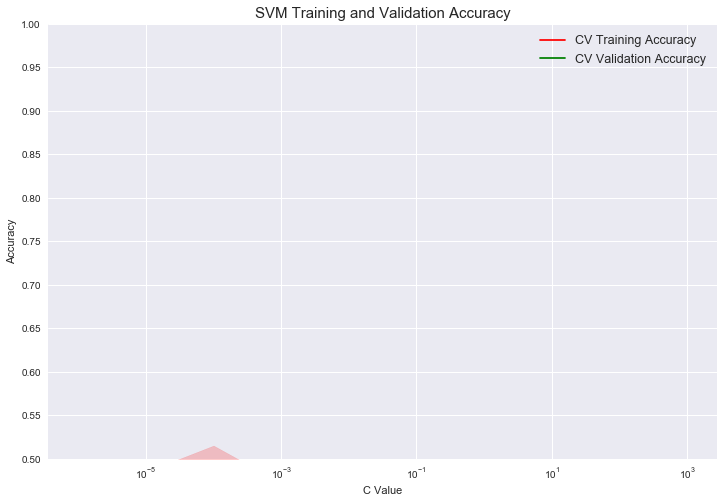

In [40]:
y_min = 0.5
y_max = 1.0

f = plt.figure(figsize = (12, 8))
ax = plt.axes()
sns.set(font_scale = 1.25)
sns.set_style("darkgrid")
plt.title("SVM Training and Validation Accuracy")
plt.xlabel("C Value")
plt.ylabel("Accuracy")
plt.ylim(y_min, y_max)
plt.yticks(np.arange(y_min, y_max + .01, .05))
plt.semilogx(C_params, train_scores_mean, label="CV Training Accuracy", color="red")
plt.fill_between(C_params, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="red")
plt.semilogx(C_params, test_scores_mean, label="CV Validation Accuracy",
             color="green")
plt.fill_between(C_params, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="green")
plt.legend(loc="best")
plt.show()

In [42]:
from sklearn.svm import SVC

Cs = np.logspace(-6, 3, 10)
parameters = [{'kernel': ['rbf'], 'C': Cs},
              {'kernel': ['linear'], 'C': Cs}]

svc = SVC(random_state = 12)

clf = GridSearchCV(estimator = svc, param_grid = parameters, cv = 2, n_jobs = -1)
clf.fit(X_train.values, y_train.values)

GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=12, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'C': array([  1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03])}, {'kernel': ['linear'], 'C': array([  1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03])}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [43]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

SVC(C=9.9999999999999995e-07, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=12, shrinking=True,
  tol=0.001, verbose=False)
{'kernel': 'rbf', 'C': 9.9999999999999995e-07}
0.30434782608695654


In [45]:
clf.score(X_test, y_test)

0.086956521739130432

In [47]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [48]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [49]:
y_pred = clf_gini.predict(X_test)
y_pred

array([2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0])

In [50]:
y_pred_en = clf_entropy.predict(X_test)
y_pred_en

array([2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 0, 0, 2, 0])

In [51]:
accuracy_score(y_test,y_pred)*100

0.0

In [52]:
accuracy_score(y_test,y_pred_en)*100

0.0